[Kaggle Kernel 1: A Journey through Rossmann Stores](https://www.kaggle.com/omarelgabry/rossmann-store-sales/a-journey-through-rossmann-stores
)

In [31]:
%matplotlib inline

#Imports
#pandas
import pandas as pd
from pandas import Series, DataFrame

#numpy,matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

#machine learning
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

import xgboost as xgb

#Display
from IPython.display import display

In [2]:
#get rossman,store,test csv files as a DataFrame
rossmann_df=pd.read_csv('data/train.csv')
store_df=pd.read_csv('data/store.csv')
test_df=pd.read_csv('data/test.csv')

#preview the data
display(rossmann_df.head())
display(store_df.head())
display(test_df.head())

/Users/pengjuzhao/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


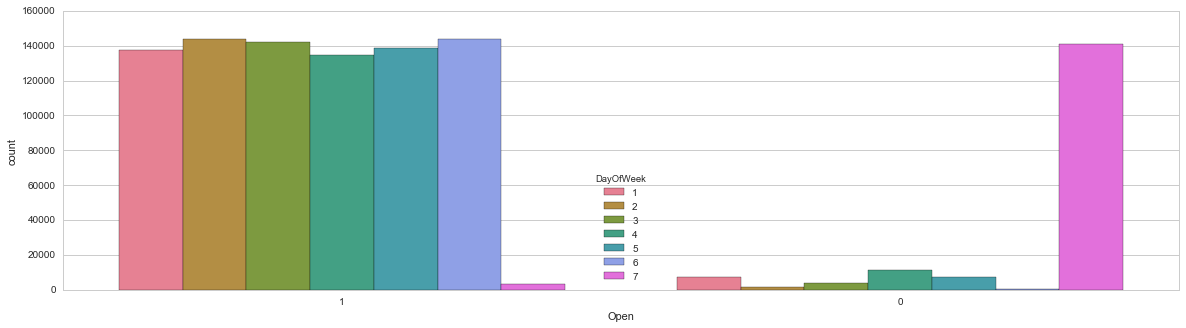

In [3]:
#Open
fig,axis1=plt.subplots(1,1,figsize=(20,5))
sns.countplot(x='Open',hue='DayOfWeek',data=rossmann_df,palette='husl',ax=axis1,order=[1,0])

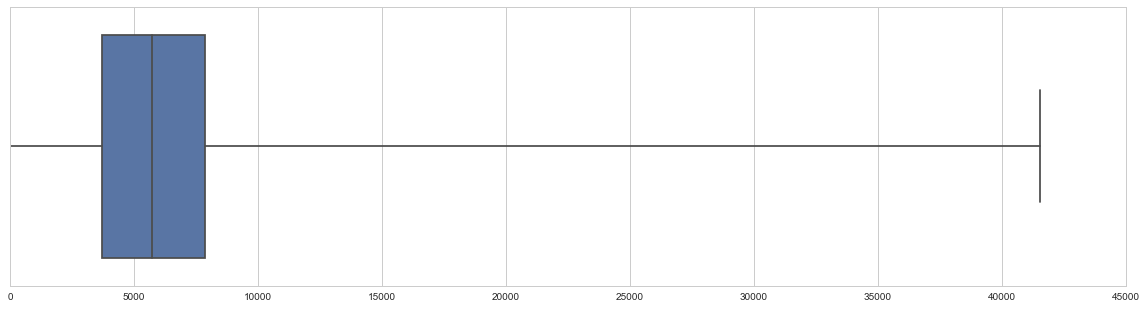

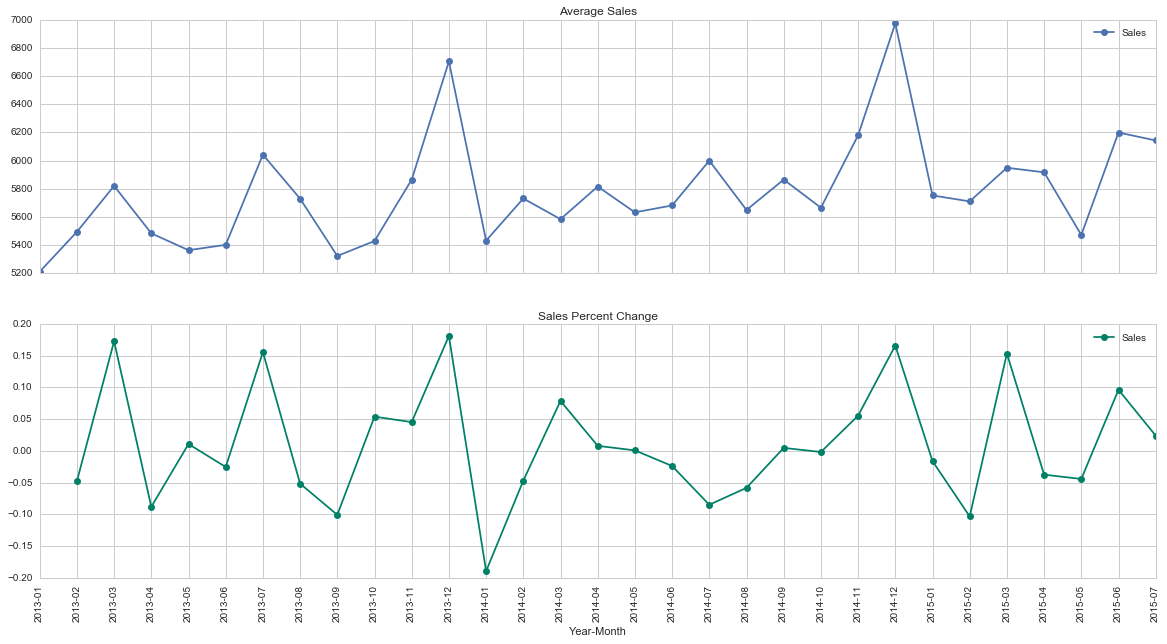

In [4]:
#Date

#Create Year and Month columns
rossmann_df['Year']=rossmann_df['Date'].apply(lambda x:int(str(x)[:4]))
rossmann_df['Month']=rossmann_df['Date'].apply(lambda x:int(str(x)[5:7]))
rossmann_df['Day']=rossmann_df['Date'].apply(lambda x:int(str(x)[8:]))

test_df['Year']=test_df['Date'].apply(lambda x:int(str(x)[:4]))
test_df['Month']=test_df['Date'].apply(lambda x:int(str(x)[5:7]))
test_df['Day']=test_df['Date'].apply(lambda x:int(str(x)[8:]))

#Create Year-Month
rossmann_df['Year-Month']=rossmann_df['Date'].apply(lambda x:(str(x)[:7]))
test_df['Year-Month']=test_df['Date'].apply(lambda x:(str(x)[:7]))

#Group by Year-Month and get average sales and percent change
average_sales=rossmann_df.groupby('Year-Month')['Sales'].mean()
pct_change_sales=rossmann_df.groupby('Year-Month')['Sales'].sum().pct_change()



# plot boxplot
fig,(axis0)=plt.subplots(1,1,figsize=(20,5))
sns.boxplot([rossmann_df['Sales']],whis=np.inf,ax=axis0)



fig,(axis1,axis2)=plt.subplots(2,1,sharex=True,figsize=(20,10))

#plot average sales over time(year-month)
ax1=average_sales.plot(legend=True,ax=axis1,marker='o',title='Average Sales')
ax1.set_xticks(range(len(average_sales)))
ax1.set_xticklabels(average_sales.index.tolist(),rotation=90)

#plot percent change for sales over time
ax2=pct_change_sales.plot(legend=True,ax=axis2,marker='o',rot=90,colormap='summer',title='Sales Percent Change')


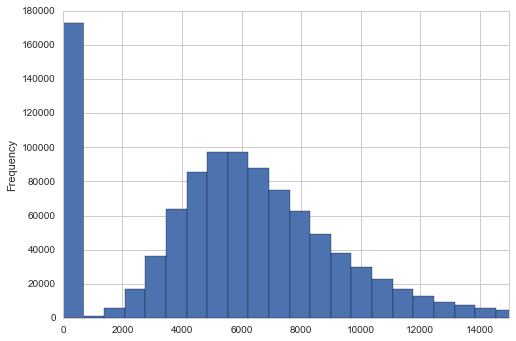

In [5]:
rossmann_df['Sales'].plot(kind='hist',bins=60,xlim=(0,15000))

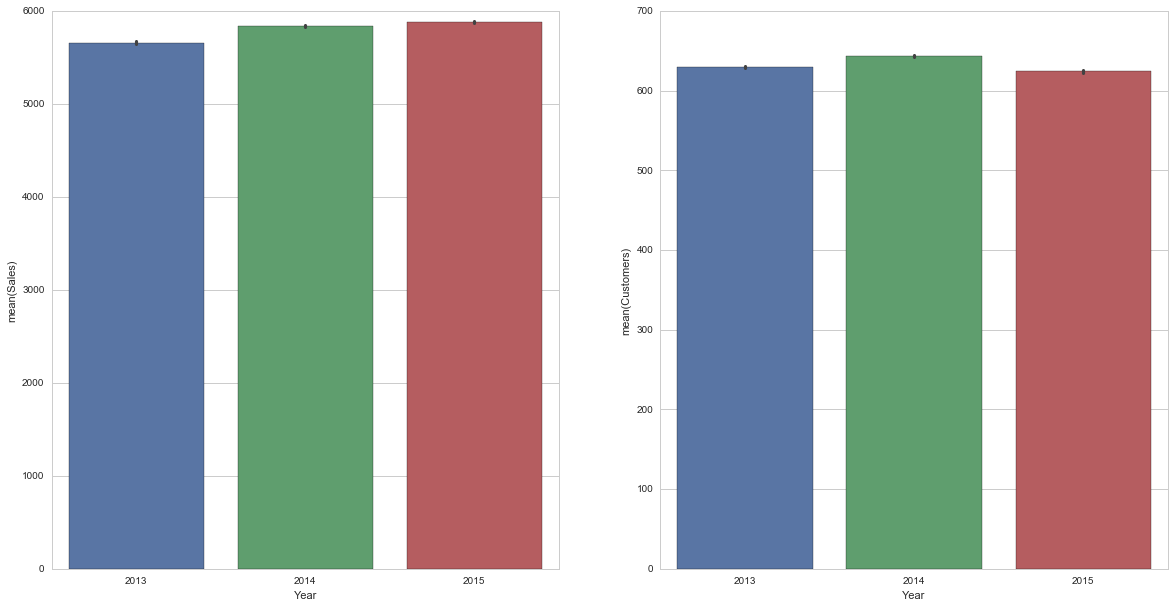

In [6]:
# ...Continue with Date

# Plot average sales and customers for every year
fig,(axis1,axis2)=plt.subplots(1,2,figsize=(20,10))

sns.barplot(x='Year',y='Sales',data=rossmann_df,ax=axis1)

sns.barplot(x='Year',y='Customers',data=rossmann_df,ax=axis2)

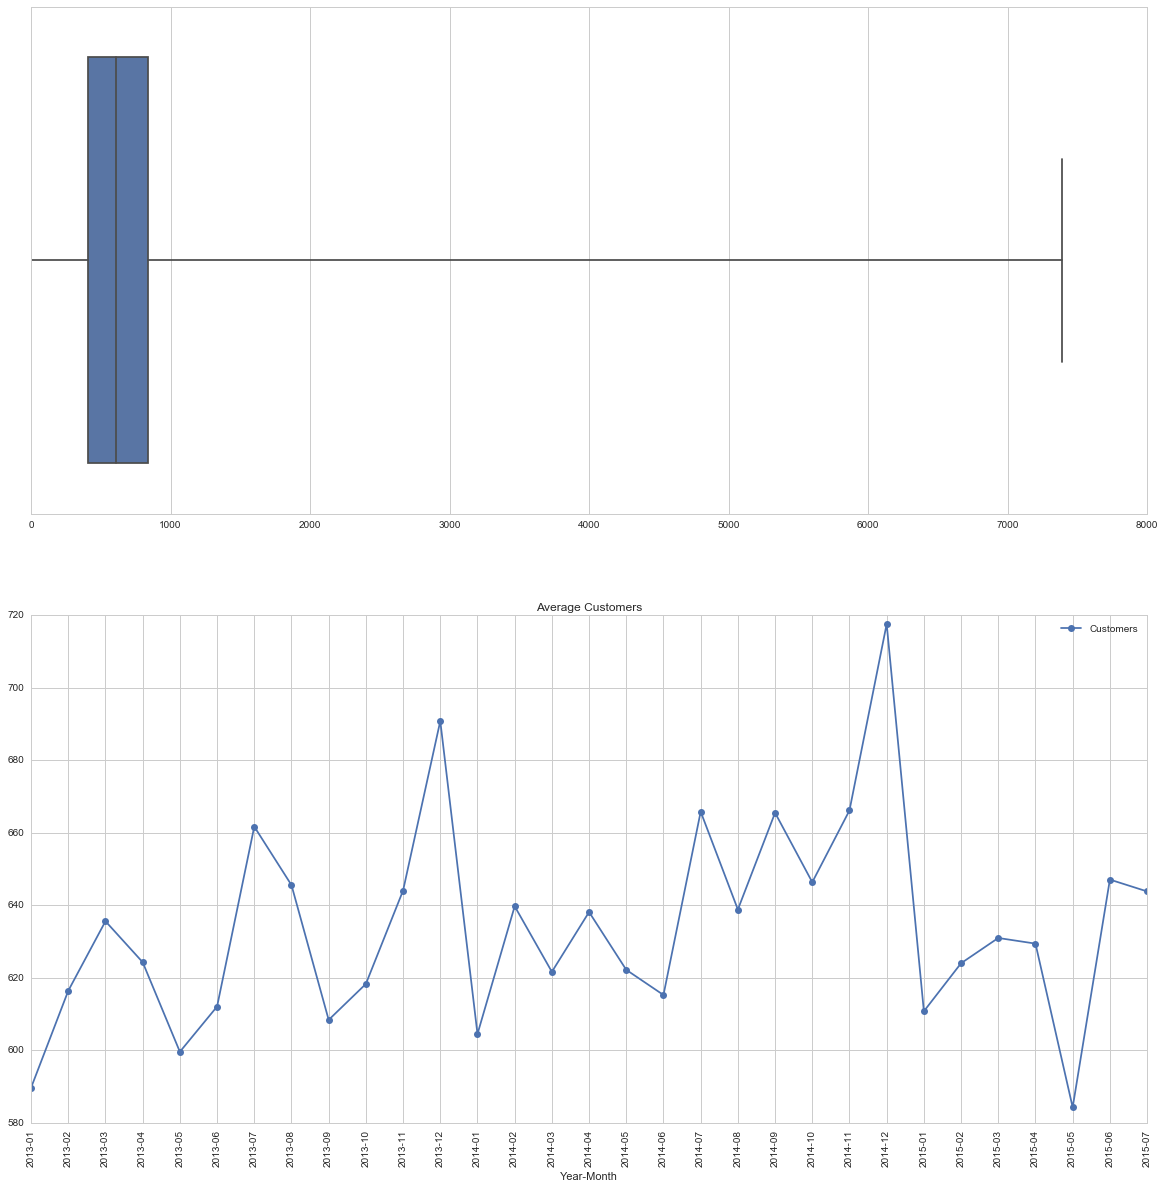

In [7]:
average_customers=rossmann_df.groupby('Year-Month')['Customers'].mean()
fig,(axis0,axis1)=plt.subplots(2,1,figsize=(20,20))

# Plot max,min,& 2nd, &3rd quartile

sns.boxplot([rossmann_df['Customers']],whis=np.inf,ax=axis0)


#plot average customers over time(year-month)
ax1=average_customers.plot(legend=True,ax=axis1,marker='o',title='Average Customers')
ax1.set_xticks(range(len(average_sales)))
xlabels=ax1.set_xticklabels(average_customers.index.tolist(),rotation=90)

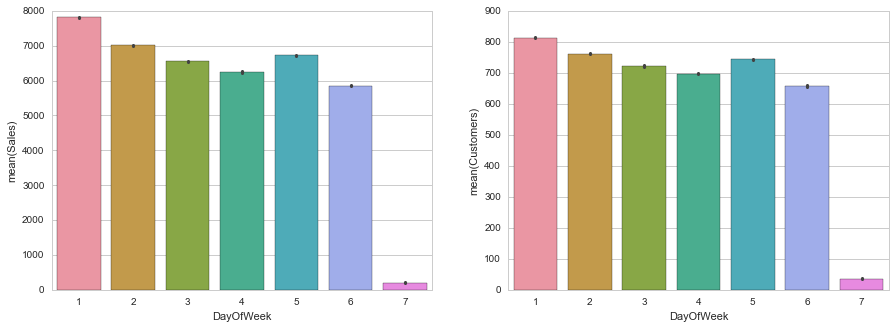

In [8]:
# DayOfWeek
# In both cases where the store is closed and opened
fig,(axis1,axis2)=plt.subplots(1,2,figsize=(15,5))
sns.barplot(x='DayOfWeek',y='Sales',data=rossmann_df,order=[1,2,3,4,5,6,7],ax=axis1)
sns.barplot(x='DayOfWeek',y='Customers',data=rossmann_df,order=[1,2,3,4,5,6,7],ax=axis2)


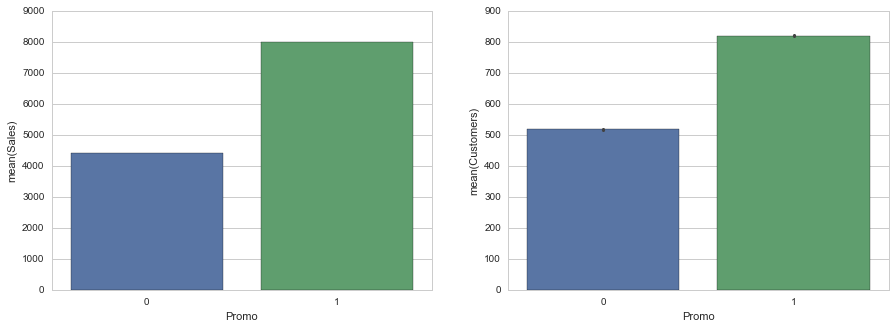

In [9]:
#Promo
# Plot average sales & customers with/without promo
fig,(axis1,axis2)=plt.subplots(1,2,figsize=(15,5))

sns.barplot(x='Promo',y='Sales',data=rossmann_df,order=[0,1],ax=axis1)
sns.barplot(x='Promo',y='Customers',data=rossmann_df,order=[0,1],ax=axis2)


/Users/pengjuzhao/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


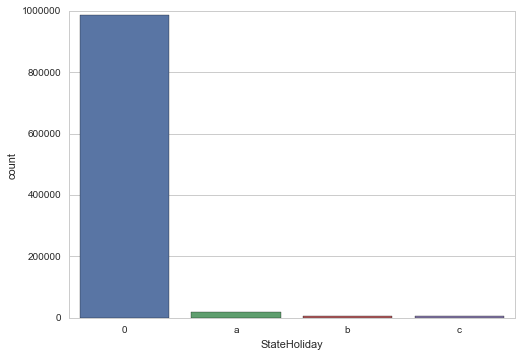

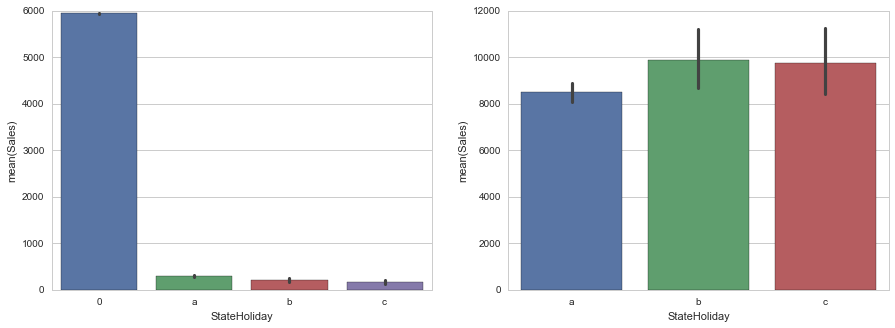

In [10]:
#StateHoliday
rossmann_df['StateHoliday'].loc[rossmann_df['StateHoliday']==0]='0'
#plot
sns.countplot(x='StateHoliday',data=rossmann_df)

#Before
fig,(axis1,axis2)=plt.subplots(1,2,figsize=(15,5))
sns.barplot(x='StateHoliday',y='Sales',data=rossmann_df,ax=axis1)

mask=((rossmann_df['StateHoliday']!="0") & (rossmann_df['Sales']>0))

sns.barplot(x='StateHoliday',y='Sales',data=rossmann_df[mask],ax=axis2)



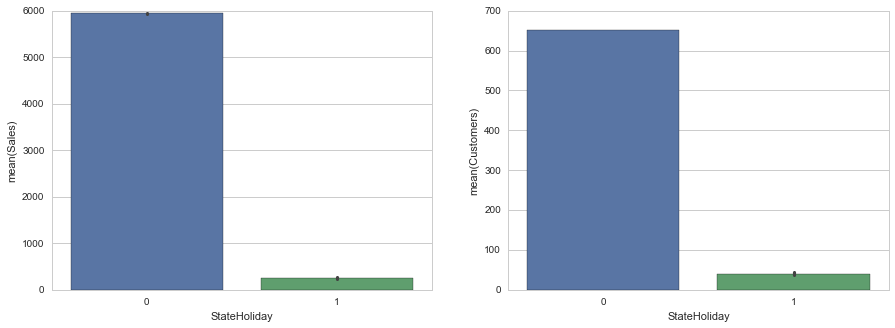

In [11]:
# .... continue with StateHoliday
rossmann_df['StateHoliday']=rossmann_df['StateHoliday'].map({0:0,"0":0,"a":1,"b":1,"c":1,1:1})
test_df['StateHoliday']=test_df['StateHoliday'].map({0:0,"0":0,"a":1,"b":1,"c":1,1:1})

fig,(axis1,axis2)=plt.subplots(1,2,figsize=(15,5))

sns.barplot(x='StateHoliday',y='Sales',data=rossmann_df,ax=axis1)

sns.barplot(x='StateHoliday',y='Customers',data=rossmann_df,ax=axis2)


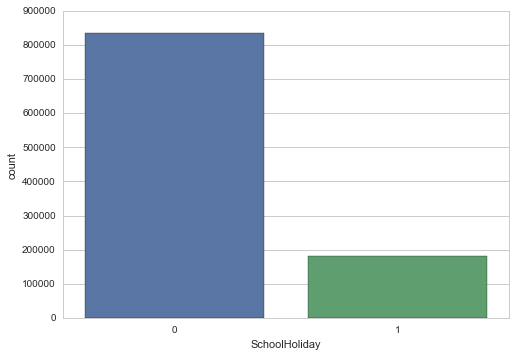

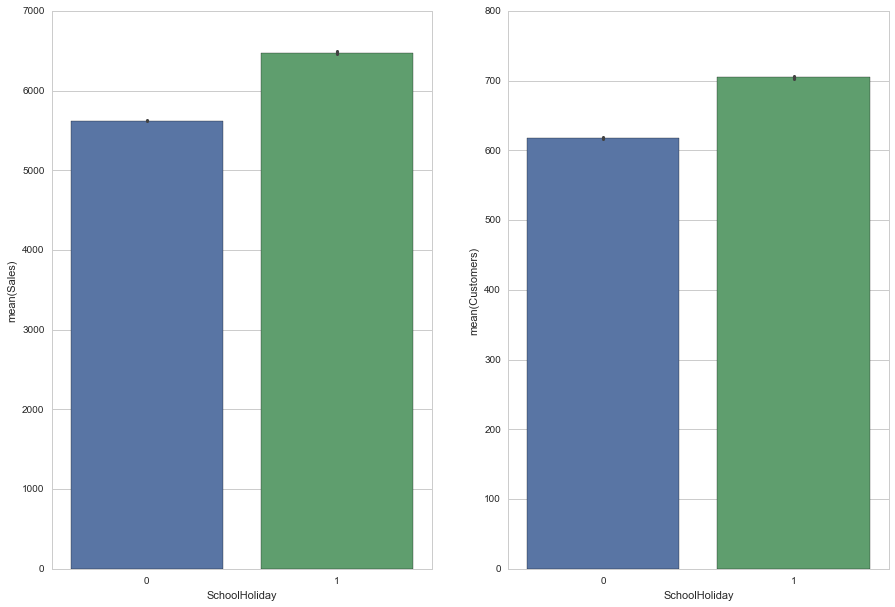

In [12]:
# SchoolHoliday
sns.countplot(rossmann_df['SchoolHoliday'])

fig,(axis1,axis2)=plt.subplots(1,2,figsize=(15,10))

sns.barplot(x='SchoolHoliday',y='Sales',data=rossmann_df,ax=axis1)

sns.barplot(x='SchoolHoliday',y='Customers',data=rossmann_df,ax=axis2)


In [13]:
# StoreType
# Plot StoreType 
average_sales_customers=rossmann_df.groupby('Store')[['Sales','Customers']].mean()

store_df=store_df.merge(average_sales_customers,left_on='Store',right_index=True)

store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Sales,Customers
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,3945.704883,467.646497
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",4122.991507,486.045648
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",5741.253715,620.286624
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,8021.769639,1100.057325
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,3867.110403,444.360934


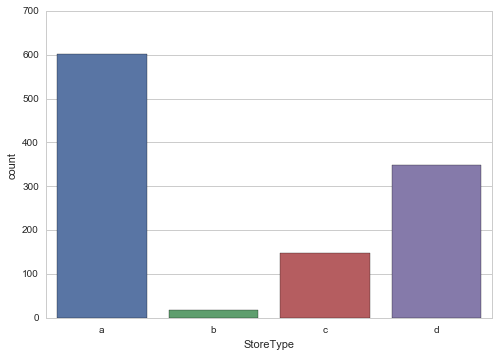

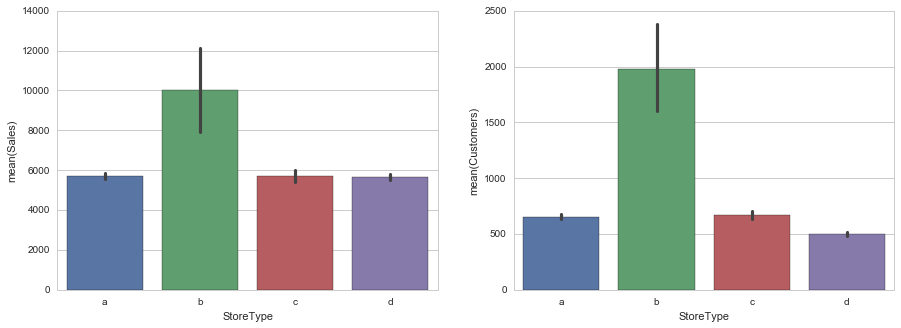

In [14]:
# Store Type
# Plot Store Type vs average sales and customers
sns.countplot(x='StoreType',order=['a','b','c','d'],data=store_df)

fig,(axis1,axis2)=plt.subplots(1,2,figsize=(15,5))

sns.barplot(x='StoreType',y='Sales',data=store_df,order=['a','b','c','d'],ax=axis1)
sns.barplot(x='StoreType',y='Customers',data=store_df,order=['a','b','c','d'],ax=axis2)

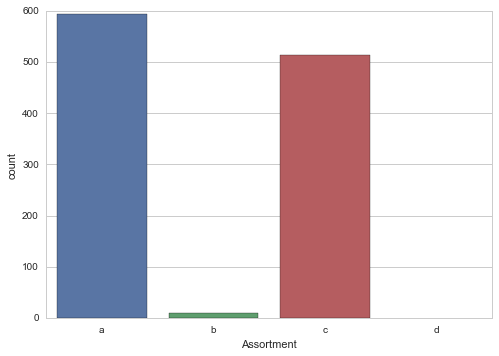

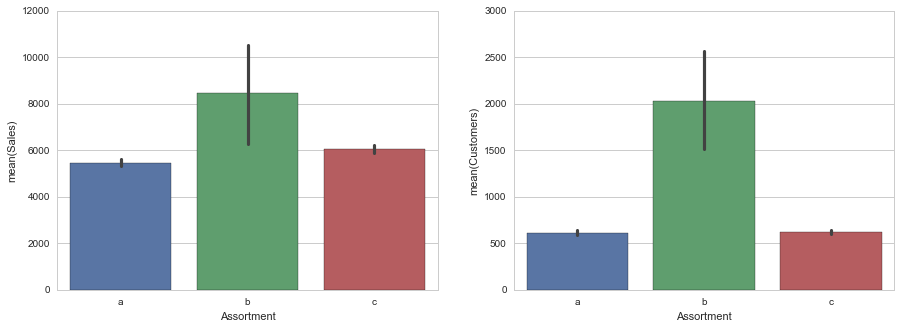

In [15]:
# Assortment
# Plot Assortment vs average sales and customers
sns.countplot(x='Assortment',order=['a','b','c','d'],data=store_df)

fig,(axis1,axis2)=plt.subplots(1,2,figsize=(15,5))

sns.barplot(x='Assortment',y='Sales',data=store_df,order=['a','b','c'],ax=axis1)
sns.barplot(x='Assortment',y='Customers',data=store_df,order=['a','b','c'],ax=axis2)

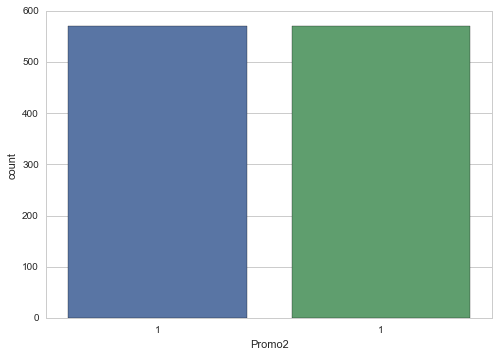

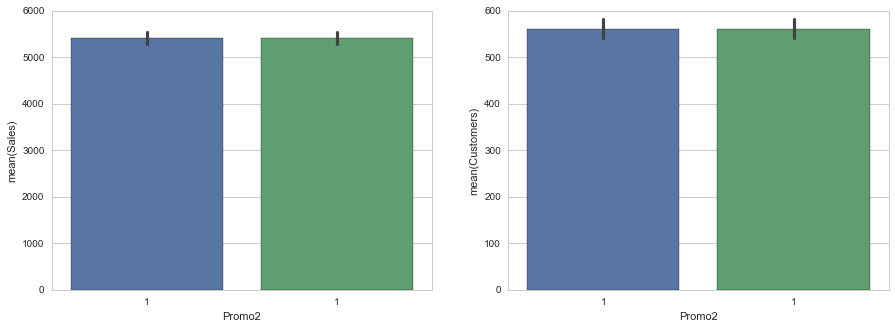

In [16]:
# Promo2
# Plot Promo2 vs average sales and customers
sns.countplot(x='Promo2',order=[1,1],data=store_df)

fig,(axis1,axis2)=plt.subplots(1,2,figsize=(15,5))

sns.barplot(x='Promo2',y='Sales',data=store_df,order=[1,1],ax=axis1)
sns.barplot(x='Promo2',y='Customers',data=store_df,order=[1,1],ax=axis2)

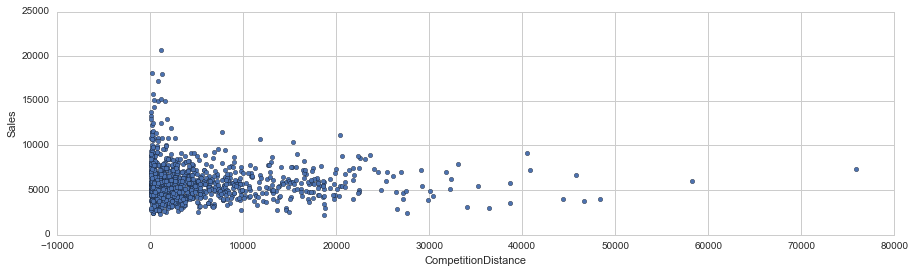

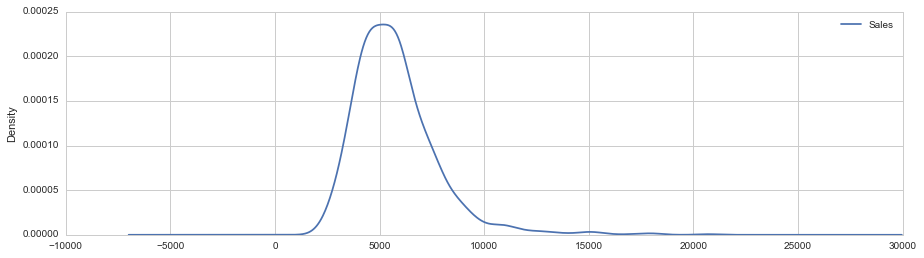

In [17]:
# CompetitionDistance

#fill NaN values
store_df['CompetitionDistance'].fillna(store_df['CompetitionDistance'].median())

# Plot CompetitionDistance vs Sales
store_df.plot(kind='scatter',x='CompetitionDistance',y='Sales',figsize=(15,4))
store_df.plot(kind='kde',x='CompetitionDistance',y='Sales',figsize=(15,4))



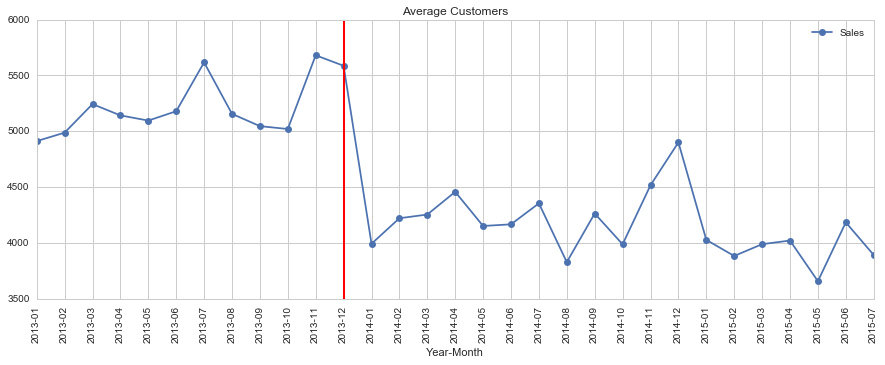

In [18]:
# What happened to the average sales of a store over time when competition started?
# Example: the average sales for store_id=6 has dramatically decreased since the competition started
store_id=6


store_id_data=rossmann_df[rossmann_df['Store']==store_id]


store_sell_record=store_id_data.groupby('Year-Month')['Sales'].mean()

ax1=store_sell_record.plot(legend=True,marker='o',title='Average Customers',figsize=(15,5))
ax1.set_xticks(range(len(store_sell_record)))
xlabels=ax1.set_xticklabels(store_sell_record.index.tolist(),rotation=90)

#Get year and month when competition started
y=store_df[store_df['Store']==store_id]['CompetitionOpenSinceYear'].values[0]
m=store_df[store_df['Store']==store_id]['CompetitionOpenSinceMonth'].values[0]



# Since all data of store sales given in rossmann_df starts with year=2013 till 2
# Need to check if year>=2013 & y & m aren't NaN values

if y>=2013 and y==y and m==m:
    plt.axvline(x=(y-2013)*12+(m-1),linewidth=2,color='red')
    

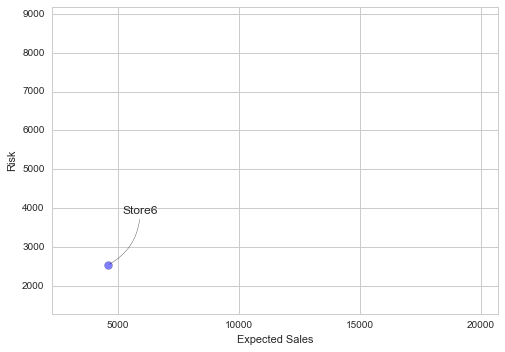

In [19]:
# Risk Analysis
# Analyze the risk of a store: Risk(std) vs Expected(mean)

store_average=store_id_data['Sales'].mean()
store_std=store_id_data['Sales'].std()

# Plot
plt.scatter(store_average,store_std,alpha=0.5,s=np.pi*20)


# Get min & max mean and std of store sales
# Remember that store_df['Sales] has the average sales for a store

std_sales=rossmann_df.groupby('Store')['Sales'].std()

min_average=store_df['Sales'].min()
max_average=store_df['Sales'].max()
min_std=std_sales.min()
max_std=std_sales.max()

# Set the x and y limits of the plot
plt.ylim([min_std,max_std])
plt.xlim([min_average,max_average])

# Set the plot axis titles
plt.xlabel('Expected Sales')
plt.ylabel('Risk')

# Set label
label,x,y="Store{}".format(store_id),store_average,store_std
plt.annotate(label,
            xy=(x,y),xytext=(50,50),
            textcoords='offset points' ,ha='right',va='bottom',
            arrowprops=dict(arrowstyle='-',connectionstyle='arc3,rad=-0.3')
            )

In [20]:
# Correlation 
# Visualize the Correlation between Scores
store_piv=pd.pivot_table(rossmann_df,values='Sales',index='Year-Month',columns='Store',aggfunc='sum')

store_pct_change=store_piv.pct_change().dropna()

store_piv.head()

Store,1,2,3,4,5,6,7,8,9,10,...,1106,1107,1108,1109,1110,1111,1112,1113,1114,1115
Year-Month,,,,,,,,,,,,,,,,,,,,,
2013-01,128431.0,115171.0,165653.0,234713.0,109442.0,152265.0,188032.0,122293.0,127016.0,130042.0,...,115116.0,143763.0,143571.0,119190.0,106800.0,128626.0,304489.0,155879.0,456530.0,116482.0
2013-02,125271.0,111114.0,160167.0,230473.0,101126.0,139655.0,178830.0,119828.0,126826.0,122956.0,...,107923.0,140576.0,127544.0,115328.0,99489.0,122822.0,301544.0,147817.0,446745.0,123114.0
2013-03,145169.0,130525.0,189179.0,255514.0,116860.0,162550.0,213082.0,135408.0,143583.0,133609.0,...,124035.0,170060.0,148065.0,124393.0,116539.0,138298.0,312362.0,171412.0,516987.0,155033.0
2013-04,118009.0,116878.0,172188.0,226981.0,106141.0,154269.0,197381.0,127236.0,136194.0,131040.0,...,110478.0,154915.0,132135.0,118303.0,106745.0,131652.0,284870.0,148796.0,497336.0,126212.0
2013-05,118225.0,116379.0,170374.0,235284.0,110292.0,157972.0,210921.0,126886.0,136540.0,130642.0,...,111092.0,151585.0,131119.0,117329.0,105277.0,128784.0,284762.0,155649.0,503359.0,131329.0


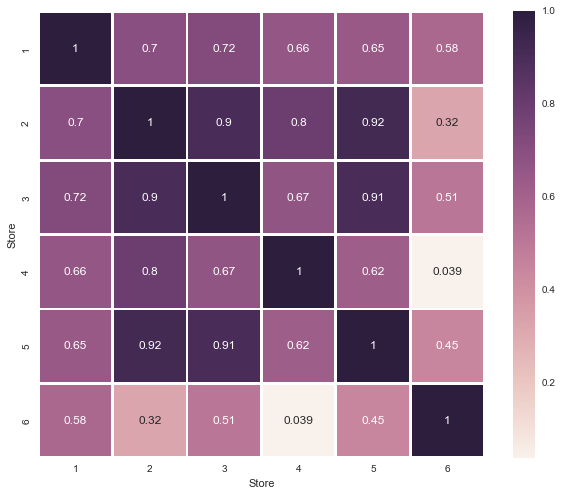

In [21]:
# Plot correlation

# Plot correlation between range of stores
start_store=1
end_store=6

fig,(axis1)=plt.subplots(1,1,figsize=(10,8))

#using summation of sales values for each store
sns.heatmap(store_piv[list(range(start_store,end_store+1))].corr(),annot=True,linewidths=2)


In [22]:
# Notice that test_df has only year=2015 months 8 &9
# drop year and month
rossmann_df.drop(['Year','Month'],axis=1,inplace=True)
test_df.drop(['Year','Month'],axis=1,inplace=True)

#Create dummy variables for DayOfWeek
day_dummies_rossmann=pd.get_dummies(rossmann_df['DayOfWeek'],prefix='Day')
day_dummies_rossmann.drop(['Day_7'],axis=1,inplace=True)

day_dummies_test=pd.get_dummies(test_df['DayOfWeek'],prefix='Day')
day_dummies_test.drop(['Day_7'],axis=1,inplace=True)

rossmann_df=rossmann_df.join(day_dummies_rossmann)
test_df=test_df.join(day_dummies_test)

rossmann_df.drop(['DayOfWeek'],axis=1,inplace=True)
test_df.drop(['DayOfWeek'],axis=1,inplace=True)



In [23]:
# remove all rows(store, date) that were closed
rossmann_df=rossmann_df[rossmann_df['Open']!=0]

#Drop unnecessary columns which won't be useful in prediction
rossmann_df.drop(['Open','Year-Month','Customers','Date'],axis=1,inplace=True)



In [24]:
# save ids of closed stores, because we will assign their sales value to 0 later
closed_store_ids=test_df['Id'][test_df['Open']==0].values

#remove all rows(store, date) that were closed
test_df=test_df[test_df['Open']!=0]

#drop unncessary cols 
test_df.drop(['Date','Open','Year-Month'],axis=1,inplace=True)


In [30]:
# Loop through each store 
# train the model using the data of current store and predict its sales values

rossmann_dic=dict(list(rossmann_df.groupby('Store')))
test_dic=dict(list(test_df.groupby('Store')))
submission=Series()
scores=[]

for i in test_dic:
    #current store
    store=rossmann_dic[i]
    
    #define traning and testing sets
    X_train=store.drop(['Store','Sales'],axis=1)
    Y_train=store['Sales']
    X_test=test_dic[i].copy()
    
    store_ids=X_test['Id']
    X_test.drop(['Id','Store'],axis=1,inplace=True)
    
    #Linear Regression
    lreg=LinearRegression()
    lreg.fit(X_train,Y_train)
    Y_pred=lreg.predict(X_test)
    
    scores.append(lreg.score(X_train,Y_train))
    
    submission=submission.append(Series(Y_pred,index=store_ids))
    
# append rows(store,date) that were closed and assign their sales values to 0
submission=submission.append(Series(0,index=closed_store_ids))
    
#save to csv file
submission=pd.DataFrame({'Id':submission.index,'Sales':submission.values})
submission.to_csv('Kaggle_Kernel_1_AJourneyThroughRossmannStores/rossmann_lreg.csv',index=False)


In [33]:
# Loop through each store 
# train the model using the data of current store and predict its sales values

rossmann_dic=dict(list(rossmann_df.groupby('Store')))
test_dic=dict(list(test_df.groupby('Store')))
submission=Series()
scores=[]

for i in test_dic:
    #current store
    store=rossmann_dic[i]
    
    #define traning and testing sets
    X_train=store.drop(['Store','Sales'],axis=1)
    Y_train=store['Sales']
    X_test=test_dic[i].copy()
    
    store_ids=X_test['Id']
    X_test.drop(['Id','Store'],axis=1,inplace=True)
    
    #Linear Regression
#     lreg=LinearRegression()
#     lreg.fit(X_train,Y_train)
#     Y_pred=lreg.predict(X_test)
    
#     scores.append(lreg.score(X_train,Y_train))
    
#     submission=submission.append(Series(Y_pred,index=store_ids))
    
# # append rows(store,date) that were closed and assign their sales values to 0
# submission=submission.append(Series(0,index=closed_store_ids))
    
# #save to csv file
# submission=pd.DataFrame({'Id':submission.index,'Sales':submission.values})
# submission.to_csv('Kaggle_Kernel_1_AJourneyThroughRossmannStores/rossmann_lreg.csv',index=False)



    #Random Forest
    rf=RandomForestRegressor(random_state=40)
    rf.fit(X_train,Y_train)
    Y_pred=rf.predict(X_test)
    
    scores.append(rf.score(X_train,Y_train))
    
    submission=submission.append(Series(Y_pred,index=store_ids))
    
# append rows(store,date) that were closed and assign their sales values to 0
submission=submission.append(Series(0,index=closed_store_ids))
    
#save to csv file
submission=pd.DataFrame({'Id':submission.index,'Sales':submission.values})
submission.to_csv('Kaggle_Kernel_1_AJourneyThroughRossmannStores/rossmann_randomforest_seed40.csv',index=False)
    

In [34]:
# Loop through each store 
# train the model using the data of current store and predict its sales values

rossmann_dic=dict(list(rossmann_df.groupby('Store')))
test_dic=dict(list(test_df.groupby('Store')))
submission=Series()
scores=[]

for i in test_dic:
    #current store
    store=rossmann_dic[i]
    
    #define traning and testing sets
    X_train=store.drop(['Store','Sales'],axis=1)
    Y_train=store['Sales']
    X_test=test_dic[i].copy()
    
    store_ids=X_test['Id']
    X_test.drop(['Id','Store'],axis=1,inplace=True)
    
    #Linear Regression
#     lreg=LinearRegression()
#     lreg.fit(X_train,Y_train)
#     Y_pred=lreg.predict(X_test)
    
#     scores.append(lreg.score(X_train,Y_train))
    
#     submission=submission.append(Series(Y_pred,index=store_ids))
    
# # append rows(store,date) that were closed and assign their sales values to 0
# submission=submission.append(Series(0,index=closed_store_ids))
    
# #save to csv file
# submission=pd.DataFrame({'Id':submission.index,'Sales':submission.values})
# submission.to_csv('Kaggle_Kernel_1_AJourneyThroughRossmannStores/rossmann_lreg.csv',index=False)



    #Random Forest
    rf=RandomForestRegressor(random_state=42)
    rf.fit(X_train,Y_train)
    Y_pred=rf.predict(X_test)
    
    scores.append(rf.score(X_train,Y_train))
    
    submission=submission.append(Series(Y_pred,index=store_ids))
    
# append rows(store,date) that were closed and assign their sales values to 0
submission=submission.append(Series(0,index=closed_store_ids))
    
#save to csv file
submission=pd.DataFrame({'Id':submission.index,'Sales':submission.values})
submission.to_csv('Kaggle_Kernel_1_AJourneyThroughRossmannStores/rossmann_randomforest_seed42.csv',index=False)
